<a href="https://colab.research.google.com/github/aebenm/Pattern-Recognition/blob/main/PatternRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
pip install pandas

In [128]:
pip install pandas astropy

In [129]:
import pandas as pd
import numpy
from datetime import datetime
import astropy.units as u
from astropy.units.quantity import Quantity
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd


In [130]:
#import dataset
url= 'https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv'
df = pd.read_csv(url)
#create food production dataset
prodDataset = pd.DataFrame(df.iloc[0:].to_dict())
prodDataset

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [131]:
prodDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 902.7+ KB


In [132]:
prodDataset.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [133]:
#coversions
prodDataset["Year"] = pd.to_datetime(prodDataset["Year"], format="%Y").dt.year
prodDataset

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [134]:
def to_kiloton(value):
    return f"{value:.0f} kt"
prodDataset["Value"] = prodDataset["Value"].apply(to_kiloton)
prodDataset

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731 kt
1,Algeria,Wheat and products,2005,2415 kt
2,Algeria,Wheat and products,2006,2688 kt
3,Algeria,Wheat and products,2007,2319 kt
4,Algeria,Wheat and products,2008,1111 kt
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0 kt
23106,Zimbabwe,Crustaceans,2010,0 kt
23107,Zimbabwe,Crustaceans,2011,0 kt
23108,Zimbabwe,Crustaceans,2012,0 kt


In [135]:
#grouping
pd_grouped = prodDataset.groupby(["Country", "Year", "Item"]).sum()
pd_grouped

Value
Country  Year Item                          
Algeria  2004 Apples and products     165 kt
              Bananas                   0 kt
              Barley and products    1212 kt
              Beans                     2 kt
              Beer                    110 kt
...                                      ...
Zimbabwe 2013 Tea (including mate)     19 kt
              Tomatoes and products    24 kt
              Vegetables, Other       203 kt
              Wheat and products       25 kt
              Wine                      2 kt

[23110 rows x 1 columns]

In [136]:
prodDataset["Value"] = prodDataset["Value"].str.split(" kt")
prodDataset["Value"] = prodDataset["Value"].apply(lambda x: sum(int(i) for i in x if i.isdigit()))

In [137]:
#Convert 'Value' column to numeric dtype
prodDataset['Value'] = pd.to_numeric(prodDataset['Value'])
prod_total = prodDataset.groupby(["Country", "Year"]).sum()
prod_total

<ipython-input-137-85ef1dca1c94>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_total = prodDataset.groupby(["Country", "Year"]).sum()


Value
Country  Year       
Algeria  2004  15536
         2005  15667
         2006  16417
         2007  14763
         2008  13841
...              ...
Zimbabwe 2009   5754
         2010   6777
         2011   7551
         2012   8173
         2013   7914

[450 rows x 1 columns]

In [141]:
sorted_prod = prod_total.sort_values(by='Value', ascending=False)
sorted_prod


Value
Country  Year        
Nigeria  2013  179631
         2012  178816
         2006  168987
         2008  167935
         2011  167403
...               ...
Djibouti 2007      63
         2008      62
         2005      62
         2006      56
         2004      55

[450 rows x 1 columns]

In [163]:
# Filter the DataFrame for the year 2010 and the item "oats"
filtered_d = prodDataset.loc[(prodDataset['Year'] == 2010) & (prodDataset['Item'] == 'Oats')]

# Group the filtered data by the 'Country' column and calculate the total production
grouped_c = filtered_d.groupby('Country')['Value'].sum()

# Find the country with the highest production of oats in 2010
highest_production_country = grouped_c.idxmax()

print(highest_production_country)


Algeria


In [159]:
# Filter the DataFrame for years between 2004 and 2013 and the item "rice"
filtered_data = prodDataset.loc[(prodDataset['Year'] >= 2004) & (prodDataset['Year'] <= 2013) & (prodDataset['Item'] ==  'Rice (Milled Equivalent)')]

# Group the filtered data by the 'Country' column and sum the production values
grouped_country = filtered_data.groupby('Country')['Value'].sum()

# Sort the values in descending order
sorted_countries = grouped_country.sort_values(ascending=False)

#the top 3 countries with the highest Rice production from 2004 to2013
highest_rice_prod = sorted_countries.index[:3]
highest_rice_prod


Index(['Egypt', 'Nigeria', 'Madagascar'], dtype='object', name='Country')

In [146]:

# Group the data by country and sum the production values
country_production = prodDataset.groupby("Country")["Value"].sum()

# Sort the values in descending order and select the top three countries
top_three_countries = country_production.nlargest(3)

top_three_countries


Country
Nigeria         1628030
Egypt            877498
South Africa     579592
Name: Value, dtype: int64

In [170]:
# Group the dataset by "Year" and "Item" and calculate the maximum production value
grouped_data = prodDataset.groupby(["Year", "Item"])["Value"].max()

# Reset the index to convert the grouped data into a DataFrame
grouped_data = grouped_data.reset_index()

# Find the row index with the highest production value for each year
max_production_indices = grouped_data.groupby("Year")["Value"].idxmax()

# Retrieve the corresponding "Item" value for each index
unique_item_highest_production = grouped_data.loc[max_production_indices, ["Year", "Item"]]

unique_item_highest_production


,Year,Item
12,2004,Cassava and products
106,2005,Cassava and products
200,2006,Cassava and products
294,2007,Cassava and products
388,2008,Cassava and products
482,2009,Cassava and products
576,2010,Cassava and products
670,2011,Cassava and products
764,2012,Cassava and products
858,2013,Cassava and products


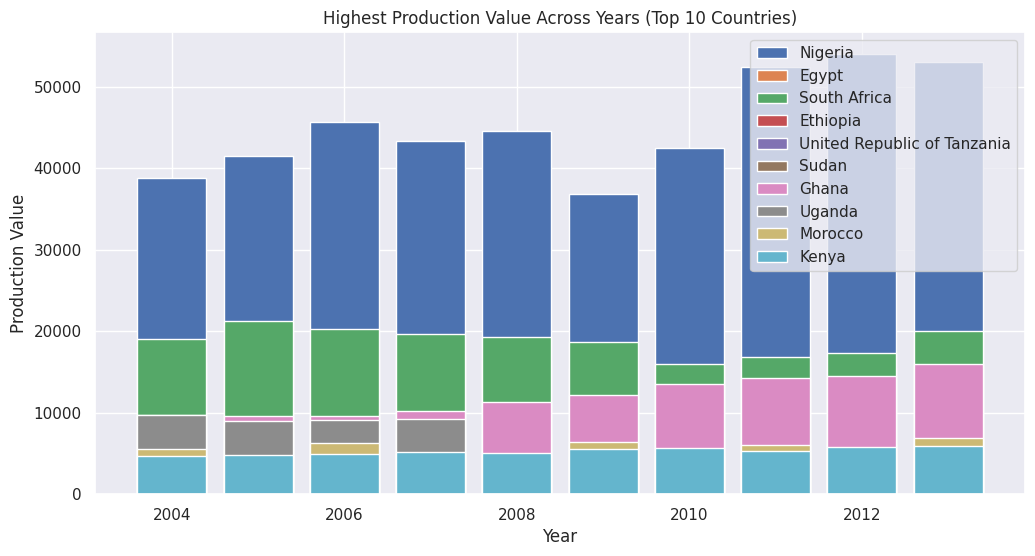

In [176]:
# Select the top 10 countries based on production value
top_10_countries = prodDataset.groupby('Country')['Value'].sum().nlargest(10).index

# Filter the dataset for the top 10 countries and group by "Year" to calculate the maximum production value
grouped_data = prodDataset[prodDataset['Country'].isin(top_10_countries)].groupby(['Year', 'Country'])['Value'].max()

# Reset the index to convert the grouped data into a DataFrame
grouped_data = grouped_data.reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
for country in top_10_countries:
    data = grouped_data[grouped_data['Country'] == country]
    plt.bar(data['Year'], data['Value'], label=country)

plt.xlabel('Year')
plt.ylabel('Production Value')
plt.title('Highest Production Value Across Years (Top 10 Countries)')
plt.legend()
plt.grid(True)
plt.show()


In [218]:
# Filter the dataset for years between 2010 and 2014
filtered_data = prodDataset.loc[(prodDataset['Year'] >= 2010) & (prodDataset['Year'] <= 2014)]

# Group the filtered data by the 'Country' column and sum the production values
grouped_country = filtered_data.groupby('Country')['Value'].sum()

# Find the country with the highest production from 2010 to 2014
highest_production_country = grouped_country.idxmax()

print(highest_production_country)


Nigeria


In [220]:
# Group the filtered data by the 'Item' column and sum the production values
grouped_item = filtered_data.groupby('Item')['Value'].sum()

# Find the item that was most produced from 2010 to 2014
most_produced_item = grouped_item.idxmax()

print(most_produced_item)


Cassava and products


In [221]:
# Sort the items in descending order
sorted_items = grouped_item.sort_values(ascending=False)

# Get the top three items that were most produced from 2010 to 2014
top_three_items = sorted_items.head(3)

print(top_three_items)

Item
Cassava and products    512041
Sugar cane              360225
Maize and products      269560
Name: Value, dtype: int64


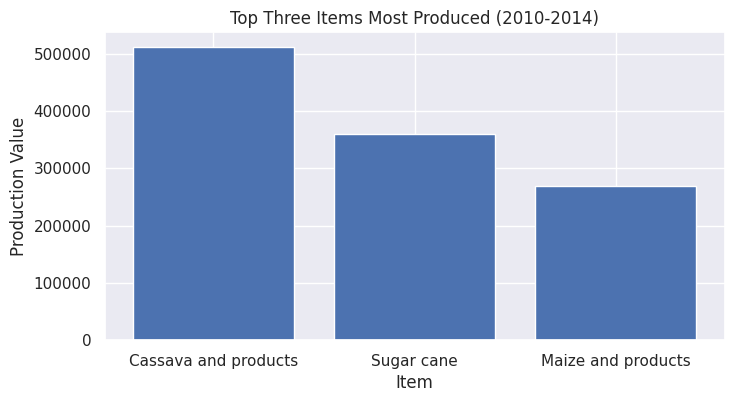

In [224]:
# Create the plot
plt.figure(figsize=(8, 4))
plt.bar(top_three_items.index, top_three_items.values)
plt.xlabel('Item')
plt.ylabel('Production Value')
plt.title('Top Three Items Most Produced (2010-2014)')
plt.grid(True)
plt.show()

<ipython-input-178-fd03ff69a020>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


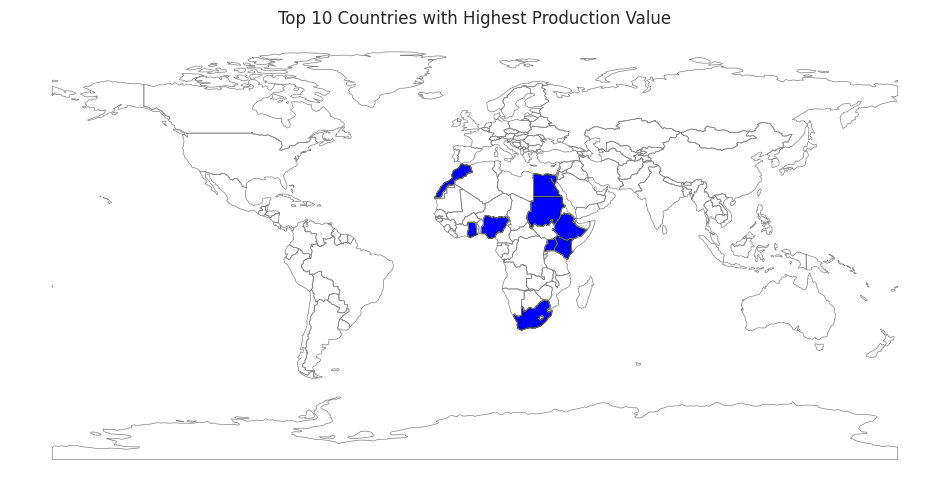

In [178]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Select the top 10 countries based on production value
top_10_countries = prodDataset.groupby('Country')['Value'].sum().nlargest(10).index

# Read the world map shapefile
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map for the top 10 countries
top_10_countries_map = world_map[world_map['name'].isin(top_10_countries)]

# Plot the map
fig, ax = plt.subplots(figsize=(12, 6))
world_map.boundary.plot(ax=ax, linewidth=0.5, color='gray')
top_10_countries_map.plot(ax=ax, color='blue', edgecolor='black')
plt.title('Top 10 Countries with Highest Production Value')
plt.axis('off')
plt.show()


In [227]:
# Group the dataset by "Year" and calculate the total production value for each year
grouped_year = prodDataset.groupby('Year')['Value'].sum()

# Identify the year with the highest production value
highest_production_year = grouped_year.idxmax()

# Identify the year with the least production value
least_production_year = grouped_year.idxmin()

print("Year with the highest production value:", highest_production_year)
print("Year with the least production value:", least_production_year)


Year with the highest production value: 2013
Year with the least production value: 2004


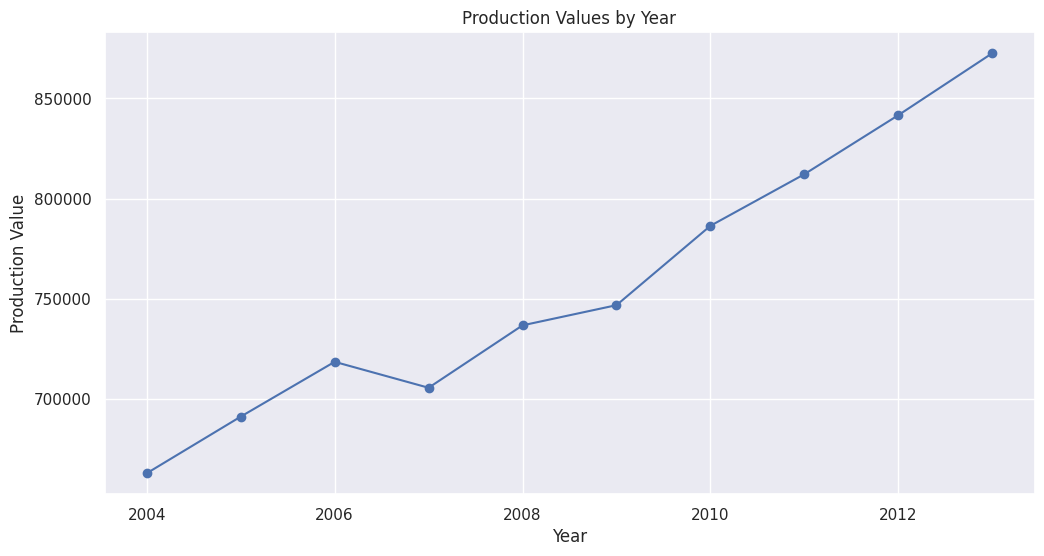

In [229]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(grouped_year.index, grouped_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Production Value')
plt.title('Production Values by Year')
plt.grid(True)
plt.show()


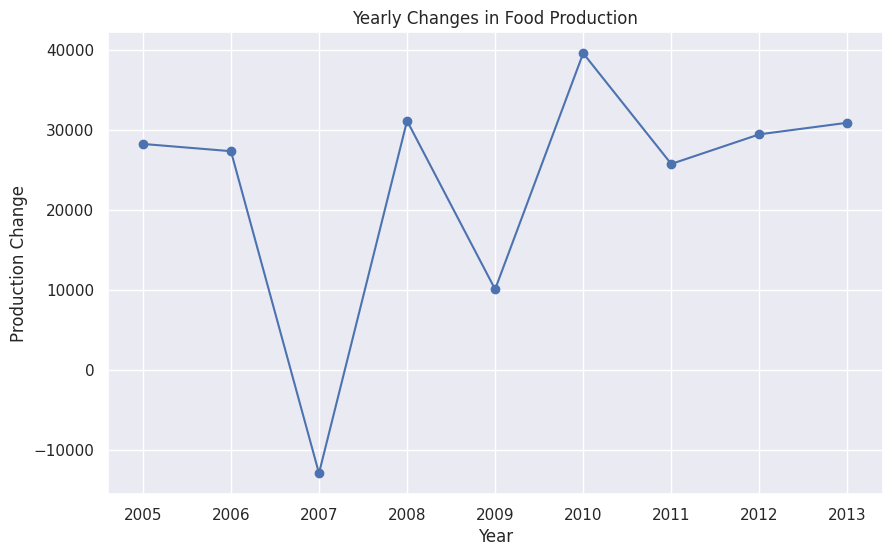

In [217]:
# Group the dataset by "Year" and calculate the total food production for each year
grouped_data = prodDataset.groupby("Year")["Value"].sum()

# Calculate the difference in production between consecutive years
yearly_changes = grouped_data.diff()

# Create a new DataFrame for yearly changes in production
df_yearly_changes = pd.DataFrame({"Year": grouped_data.index, "Production Change": yearly_changes})

# Plot the yearly changes in production
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_changes["Year"], df_yearly_changes["Production Change"], marker='o')
plt.xlabel("Year")
plt.ylabel("Production Change")
plt.title("Yearly Changes in Food Production")
plt.grid(True)
plt.show()


import Food Supply Dataset

In [179]:
#import dataset
url= 'https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv'
df_2 = pd.read_csv(url)
df_2

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [182]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [183]:
#coversions
df_2["Year"] = pd.to_datetime(df_2["Year"], format="%Y").dt.year
#df_2['Value'] = df_2['Value'].astype(str) + ' kcal/person/day'
df_2

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [186]:
#groupby Country
new_group = df_2.groupby(['Country', 'Year']).sum()
new_group


Value
Country  Year       
Algeria  2004   2987
         2005   2958
         2006   3047
         2007   3041
         2008   3048
...              ...
Zimbabwe 2009   2147
         2010   2168
         2011   2200
         2012   2197
         2013   2110

[450 rows x 1 columns]

In [197]:
# Filter for the top 10 countries with the highest supply
top_10_countries = new_group.groupby('Country').sum().nlargest(10, 'Value')

# Display the top 10 countries
print(top_10_countries)


               Value
Country             
Egypt          34580
Tunisia        33055
Morocco        32967
Algeria        31118
Mauritius      30543
South Africa   29629
Ghana          29180
Cote d'Ivoire  27666
Mali           27502
Mauritania     27443


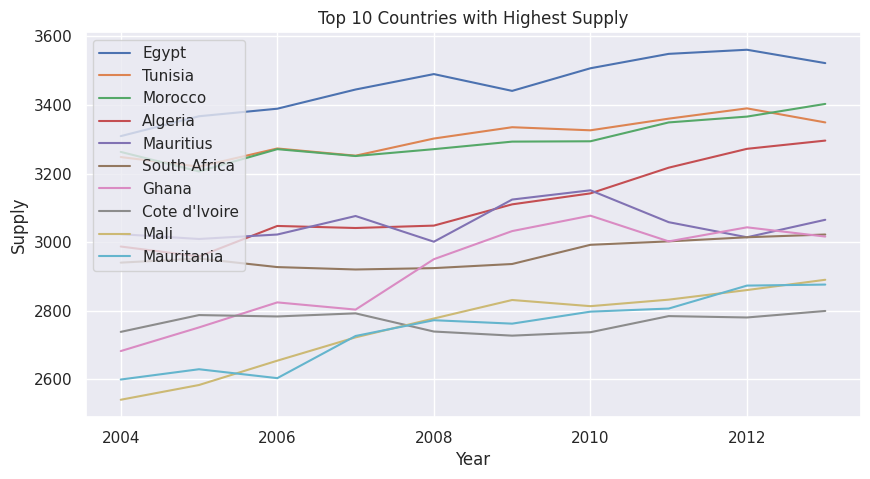

In [200]:
# Plot the graph
plt.figure(figsize=(10, 5))
for country in top_10_countries.index:
    country_data = new_group.loc[country]
    plt.plot(country_data.index, country_data['Value'], label=country)

# Set plot title and axis labels
plt.title('Top 10 Countries with Highest Supply')
plt.xlabel('Year')
plt.ylabel('Supply')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [190]:
a_group = df_2['Value'].groupby(df_2['Country']).sum()
a_group

Country
Algeria                        31118
Angola                         22556
Benin                          25378
Botswana                       22263
Burkina Faso                   26072
Cabo Verde                     25514
Cameroon                       24603
Central African Republic       20719
Chad                           20511
Congo                          21530
Cote d'Ivoire                  27666
Djibouti                       24165
Egypt                          34580
Ethiopia                       20292
Gabon                          27299
Gambia                         25695
Ghana                          29180
Guinea                         25180
Guinea-Bissau                  22963
Kenya                          21453
Lesotho                        25588
Liberia                        21827
Madagascar                     20608
Malawi                         22925
Mali                           27502
Mauritania                     27443
Mauritius                     

In [192]:
sorted_2 = new_group.sort_values(by='Value', ascending=False)
sorted_2

Value
Country Year       
Egypt   2012   3561
        2011   3549
        2013   3522
        2010   3507
        2008   3490
...             ...
Zambia  2005   1873
        2004   1866
        2006   1838
        2008   1801
        2007   1781

[450 rows x 1 columns]

In [193]:
# Filter the DataFrame for years between 2004 and 2006
filtered_2 = df_2.loc[(df_2['Year'] >= 2004) & (df_2['Year'] <= 2006)]

# Group the filtered data by the 'Country' column and calculate the total food supply
grouped_2 = filtered_2.groupby('Country')['Value'].sum()

# Sort the values in ascending order
sorted_2 = grouped_2.sort_values()

# Retrieve the first three countries with the lowest food supply
lowest_food_supply_countries = sorted_2.head(3)

print(lowest_food_supply_countries)


Country
Zambia                      5577
Ethiopia                    5827
Central African Republic    6044
Name: Value, dtype: int64


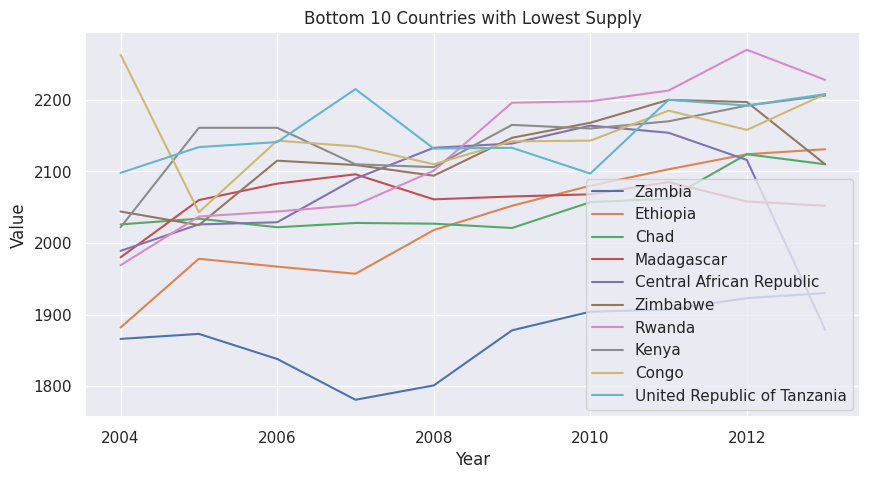

In [201]:
# Filter for the bottom 10 countries with the lowest supply
bottom_10_countries = new_group.groupby('Country').sum().nsmallest(10, 'Value')

# Plot the graph
plt.figure(figsize=(10, 5))
for country in bottom_10_countries.index:
    country_data = new_group.loc[country]
    plt.plot(country_data.index, country_data['Value'], label=country)

# Set plot title and axis labels
plt.title('Bottom 10 Countries with Lowest Supply')
plt.xlabel('Year')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show the plot
plt.show()







In [234]:
# Find the country with the highest supply
highest_year = df_2['Year'][df_2['Value'].idxmax()]

# Find the country with the lowest supply
lowest_year = df_2['Year'][df_2['Value'].idxmin()]

# Print the results
print("Year with the highest supply:", highest_year)
print("Year with the lowest supply:", lowest_year)

Year with the highest supply: 2012
Year with the lowest supply: 2007


In [246]:
# Calculate the average food production
average_production = prodDataset['Value'].mean()

# Calculate the median food production
median_production = prodDataset['Value'].median()

print("Average Food Production:", average_production)
print("Median Food Production:", median_production)


Average Food Production: 327.7852012115967
Median Food Production: 18.0


In [248]:
# Calculate the descriptive statistics
descriptive_stats = prodDataset['Value'].describe()

# Extract the quartiles and IQR values
q1 = descriptive_stats['25%']
q3 = descriptive_stats['75%']
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find the outliers
outliers = prodDataset[(prodDataset['Value'] < lower_bound) | (prodDataset['Value'] > upper_bound)]

print("Quartiles:")
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr)
print("Outliers:")
print(outliers)


Quartiles:
Q1: 3.0
Q3: 108.0
IQR: 105.0
Outliers:
        Country                     Item  Year  Value
0       Algeria       Wheat and products  2004   2731
1       Algeria       Wheat and products  2005   2415
2       Algeria       Wheat and products  2006   2688
3       Algeria       Wheat and products  2007   2319
4       Algeria       Wheat and products  2008   1111
...         ...                      ...   ...    ...
23085  Zimbabwe  Milk - Excluding Butter  2009    389
23086  Zimbabwe  Milk - Excluding Butter  2010    396
23087  Zimbabwe  Milk - Excluding Butter  2011    400
23088  Zimbabwe  Milk - Excluding Butter  2012    410
23089  Zimbabwe  Milk - Excluding Butter  2013    410

[3696 rows x 4 columns]


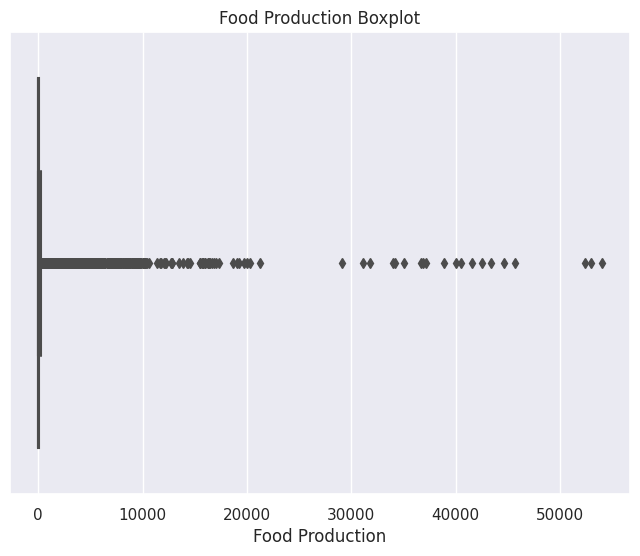

In [252]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=prodDataset['Value'])
plt.xlabel('Food Production')
plt.title('Food Production Boxplot')
plt.show()

In [253]:
# Group the df_2 dataframe by 'Year' and calculate the average food consumption for each year
avg_food_consumption = df_2.groupby('Year')['Value'].mean()

# Group the prodDataset dataframe by 'Year' and calculate the average food production for each year
avg_food_production = prodDataset.groupby('Year')['Value'].mean()

# Create a new DataFrame to store the comparison
comparison_df = pd.DataFrame({'Year': avg_food_consumption.index,
                             'Average Food Consumption': avg_food_consumption.values,
                             'Average Food Production': avg_food_production.values})

comparison_df


,Year,Average Food Consumption,Average Food Production
0,2004,2394.222222,286.767301
1,2005,2409.288889,298.986592
2,2006,2430.800000,310.814014
3,2007,2447.755556,305.215830
4,2008,2460.755556,318.686851
5,2009,2482.222222,323.040657
6,2010,2497.400000,340.166955
7,2011,2515.422222,351.303633
8,2012,2527.644444,364.831816
9,2013,2532.244444,378.227568


In [254]:
# Identify the year with the highest average food consumption value
highest_consumption_year = comparison_df['Year'].loc[comparison_df['Average Food Consumption'].idxmax()]

# Identify the year with the lowest average food consumption value
lowest_consumption_year = comparison_df['Year'].loc[comparison_df['Average Food Consumption'].idxmin()]

# Identify the year with the highest average food production value
highest_production_year = comparison_df['Year'].loc[comparison_df['Average Food Production'].idxmax()]

# Identify the year with the lowest average food production value
lowest_production_year = comparison_df['Year'].loc[comparison_df['Average Food Production'].idxmin()]

print("Year with the highest average food consumption value:", highest_consumption_year)
print("Year with the lowest average food consumption value:", lowest_consumption_year)
print("Year with the highest average food production value:", highest_production_year)
print("Year with the lowest average food production value:", lowest_production_year)


Year with the highest average food consumption value: 2013
Year with the lowest average food consumption value: 2004
Year with the highest average food production value: 2013
Year with the lowest average food production value: 2004


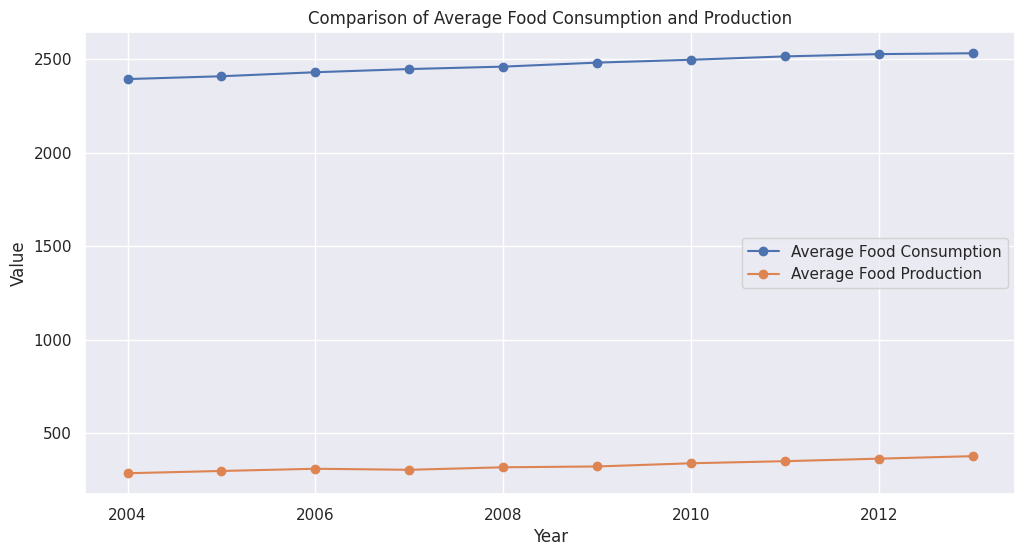

In [269]:
# Extract the data from the comparison_df dataframe
years = comparison_df['Year']
avg_food_consumption = comparison_df['Average Food Consumption']
avg_food_production = comparison_df['Average Food Production']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(years, avg_food_consumption, marker='o', label='Average Food Consumption')
plt.plot(years, avg_food_production, marker='o', label='Average Food Production')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Comparison of Average Food Consumption and Production')
plt.legend()
plt.grid(True)
plt.show()


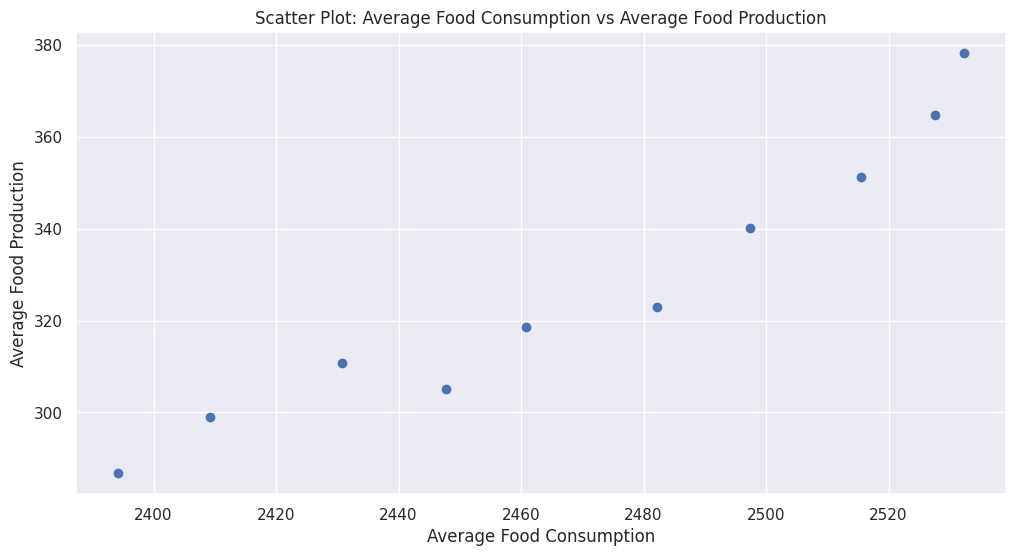

In [268]:

plt.figure(figsize=(12, 6))
plt.scatter(avg_food_consumption, avg_food_production)
plt.xlabel('Average Food Consumption')
plt.ylabel('Average Food Production')
plt.title('Scatter Plot: Average Food Consumption vs Average Food Production')
plt.grid(True)
plt.show()


In [265]:
# Filter the prodDataset for the item "Rice (Milled Equivalent)"
rice_data = prodDataset[prodDataset['Item'] == 'Rice (Milled Equivalent)']

# Create a new DataFrame for the rice database
rice_database = pd.DataFrame(rice_data)

# Reset the index of the rice database
rice_database.reset_index(drop=True, inplace=True)

rice_database


,Country,Item,Year,Value
0,Algeria,Rice (Milled Equivalent),2004,0
1,Algeria,Rice (Milled Equivalent),2005,0
2,Algeria,Rice (Milled Equivalent),2006,0
3,Algeria,Rice (Milled Equivalent),2007,0
4,Algeria,Rice (Milled Equivalent),2008,0
...,...,...,...,...
375,Zimbabwe,Rice (Milled Equivalent),2009,0
376,Zimbabwe,Rice (Milled Equivalent),2010,0
377,Zimbabwe,Rice (Milled Equivalent),2011,0
378,Zimbabwe,Rice (Milled Equivalent),2012,0


import numpy as np
from google.colab import autoviz
df_8422485938438983308 = autoviz.get_registered_df('df_8422485938438983308')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8422485938438983308, *['Value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7018829415047314951 = autoviz.get_registered_df('df_7018829415047314951')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7018829415047314951, *['Value'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5716783782156164062 = autoviz.get_registered_df('df_5716783782156164062')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5716783782156164062, *['Year', 'Value', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_61199821464153859 = autoviz.get_registered_df('df_61199821464153859')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_61199821464153859, *['Year', 'count()', None], **{})
chart